# Identify M018 bad minutes and plot CSD

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from kfx.load import load_csd, load_psd

path1 = '/Users/lukearend/Downloads/lfp_epoch_all_trials_CSD.mat'
path2 = '/Users/lukearend/Downloads/mask_low_high_speed_CSD.mat'
path = '/Users/lukearend/Downloads/psd_hpc_csd.mat'
csd = load_csd(path1, path2)
psd = load_psd(path)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['image.cmap'] = 'viridis'

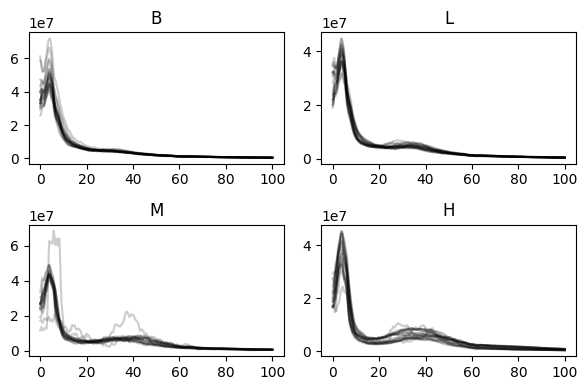

In [75]:
fig, axs = plt.subplots(2, 2, figsize=(6, 4))
for i, epoch in enumerate(['B', 'L', 'M', 'H']):
    for minute in range(20):
        plt.sca(axs.flat[i])
        x = psd.columns
        y = psd.xs(epoch).loc[minute]
        plt.plot(x, y, alpha=0.2, color='k')
        plt.title(epoch)
plt.tight_layout()
plt.show()

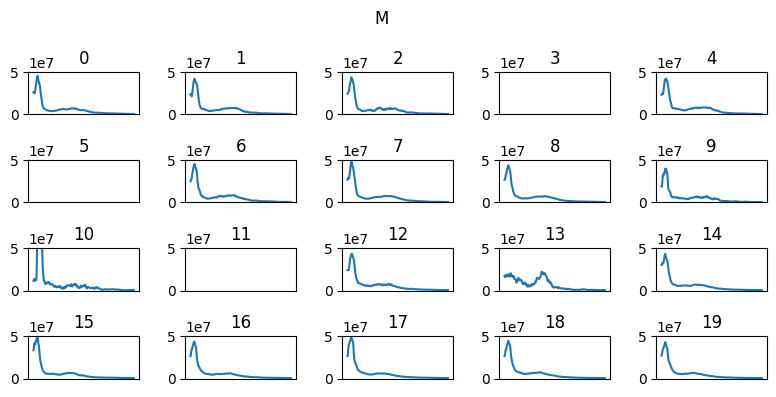

In [136]:
fig, axs = plt.subplots(4, 5, figsize=(8, 4))
for minute in range(20):
    plt.sca(axs.flat[minute])
    x = psd.columns
    y = psd.xs('M').loc[minute]
    plt.plot(x, y)
    plt.ylim([0, 5e7])
    plt.xticks([])
    plt.title(minute)
plt.suptitle('M')
plt.tight_layout()
plt.show()

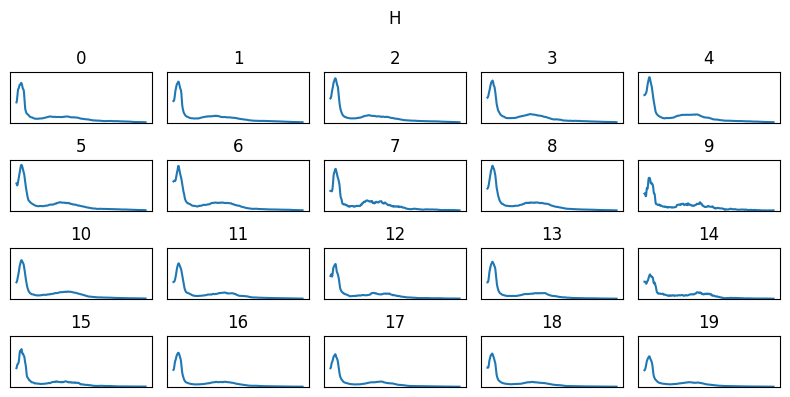

In [137]:
fig, axs = plt.subplots(4, 5, figsize=(8, 4))
for minute in range(20):
    plt.sca(axs.flat[minute])
    x = psd.columns
    y = psd.xs('H').loc[minute]
    plt.plot(x, y)
    plt.ylim([0, 5e7])
    plt.xticks([])
    plt.yticks([])
    plt.title(minute)
plt.suptitle('H')
plt.tight_layout()
plt.show()

M: 10 13; 3 5 11 missing. H: 7 9 14

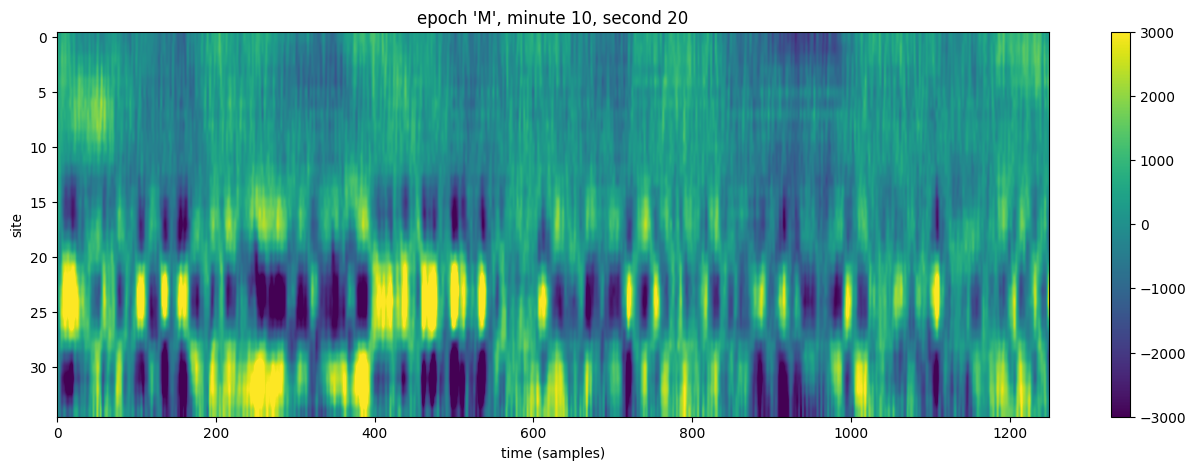

In [139]:
X = csd.xs('M').loc[pd.IndexSlice[10, 20], :]
plt.figure(figsize=(16, 5))
plt.imshow(X.T, vmin=-3e3, vmax=3e3)
plt.colorbar()
plt.title("epoch 'M', minute 10, second 20")
plt.ylabel('site')
plt.xlabel('time (samples)')
plt.axis('auto');

todo: find this exact second in the spiking data and get to know it.